**Nom: David Morillo Massagué**

**NIU: 1666540**

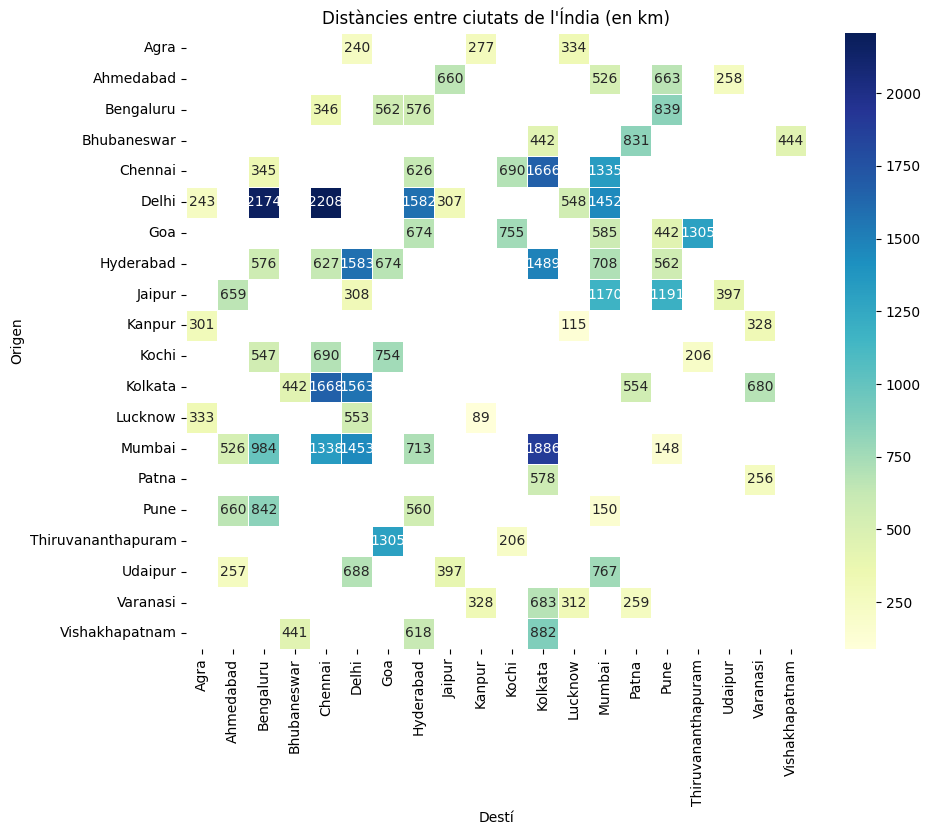

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importar el fitxer CSV (origen, destí, distància)
data = np.genfromtxt('indian-cities-dataset.csv', delimiter=',', dtype=str, skip_header=1)

# Extreure les columnes d'origen, destí i distància
origins = data[:, 0]
destinations = data[:, 1]
distances = data[:, 2].astype(int)

# Crear un diccionari per assignar un índex únic a cada ciutat
cities = np.unique(np.concatenate((origins, destinations)))
city_indices = {city: index for index, city in enumerate(cities)}

# Crear una matriu de distàncies amb NaN per indicar falta de connexió
num_cities = len(cities)
distance_matrix = np.full((num_cities, num_cities), np.nan)

for origin, destination, distance in zip(origins, destinations, distances):
    origin_index = city_indices[origin]
    destination_index = city_indices[destination]
    distance_matrix[origin_index, destination_index] = distance

# Crear un heatmap per visualitzar la matriu de costos
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, annot=True, cmap="YlGnBu", fmt=".0f", linewidths=0.5, 
            xticklabels=cities, yticklabels=cities)
plt.xlabel('Destí')
plt.ylabel('Origen')
plt.title('Distàncies entre ciutats de l\'Índia (en km)')
plt.show()


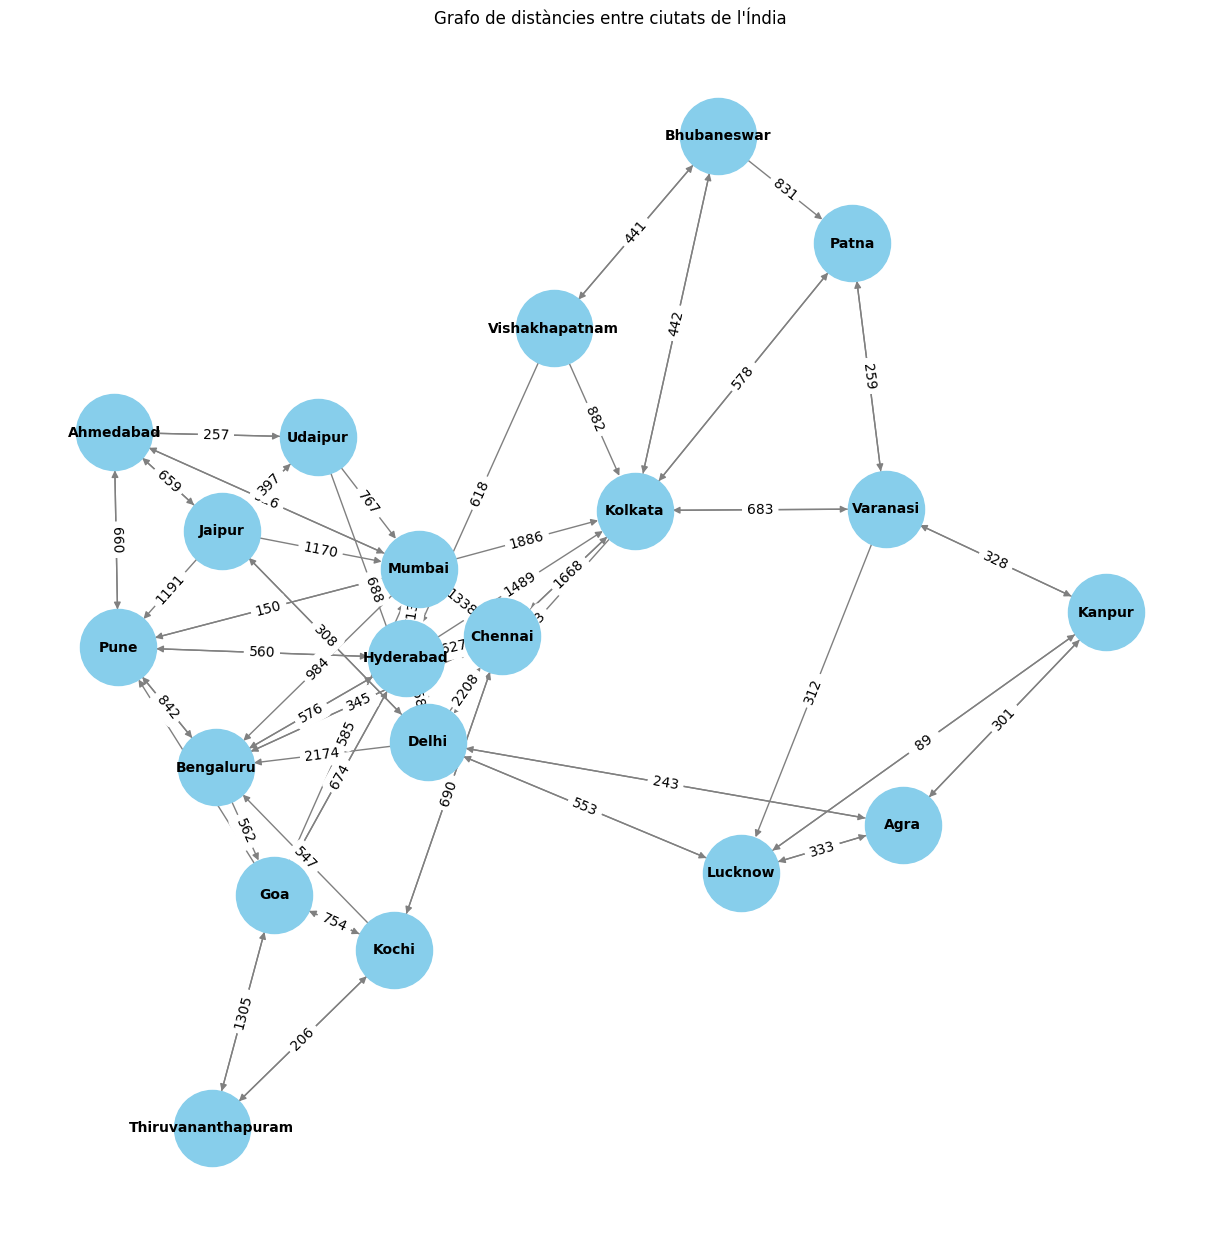

In [41]:
import networkx as nx

# Crear grafo dirigit
G = nx.DiGraph()

# Afegir nodes
G.add_nodes_from(cities)

# Afegir arestes amb pesos
for origin, destination, distance in zip(origins, destinations, distances):
    G.add_edge(origin, destination, weight=distance)

# Dibuixar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')

# Etiquetes de les arestes sense decimals
labels = {edge: f'{weight:.0f}' for edge, weight in nx.get_edge_attributes(G, 'weight').items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title('Grafo de distàncies entre ciutats de l\'Índia')
plt.show()

In [42]:
# Algoritme de Dijkstra (custom)
def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    visited = set()
    routes = {node: [] for node in graph.nodes}
    while len(visited) < len(graph.nodes):
        current = min((node for node in graph.nodes if node not in visited), key=lambda node: distances[node])
        visited.add(current)
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                new_distance = distances[current] + graph[current][neighbor]['weight']
                if new_distance < distances[neighbor]:
                    distances[neighbor] = new_distance
                    routes[neighbor] = routes[current] + [current]
    return distances, routes

# Distàncies i rutes des de Delhi
goal = 'Delhi'
distances_from_delhi, routes_from_delhi = dijkstra(G, goal)

# Mostrar resultats
for city, distance in list(distances_from_delhi.items()):
    if city == goal:
        continue
    print(f'Distància des de Delhi a {city}: {distance:.0f} km')
    route = ' -> '.join(routes_from_delhi[city] + [city])
    print(f'Ruta: {route}\n')


Distància des de Delhi a Agra: 243 km
Ruta: Delhi -> Agra

Distància des de Delhi a Ahmedabad: 961 km
Ruta: Delhi -> Jaipur -> Udaipur -> Ahmedabad

Distància des de Delhi a Bengaluru: 2158 km
Ruta: Delhi -> Hyderabad -> Bengaluru

Distància des de Delhi a Bhubaneswar: 1973 km
Ruta: Delhi -> Agra -> Kanpur -> Varanasi -> Kolkata -> Bhubaneswar

Distància des de Delhi a Chennai: 2208 km
Ruta: Delhi -> Chennai

Distància des de Delhi a Goa: 2256 km
Ruta: Delhi -> Hyderabad -> Goa

Distància des de Delhi a Hyderabad: 1582 km
Ruta: Delhi -> Hyderabad

Distància des de Delhi a Jaipur: 307 km
Ruta: Delhi -> Jaipur

Distància des de Delhi a Kanpur: 520 km
Ruta: Delhi -> Agra -> Kanpur

Distància des de Delhi a Kochi: 2898 km
Ruta: Delhi -> Chennai -> Kochi

Distància des de Delhi a Kolkata: 1531 km
Ruta: Delhi -> Agra -> Kanpur -> Varanasi -> Kolkata

Distància des de Delhi a Lucknow: 548 km
Ruta: Delhi -> Lucknow

Distància des de Delhi a Mumbai: 1452 km
Ruta: Delhi -> Mumbai

Distància des 